In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('concated_edgi.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              12 non-null     int64  
 1   Survey Year                             12 non-null     int64  
 2   Country Name                            12 non-null     object 
 3   E-Government Rank                       12 non-null     int64  
 4   E-Government Index                      12 non-null     float64
 5   E-Participation Index                   12 non-null     float64
 6   Online Service Index                    12 non-null     float64
 7   Human Capital Index                     12 non-null     float64
 8   Telecommunication Infrastructure Index  12 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 996.0+ bytes


In [33]:
df_tidy = df.melt(
    id_vars='Survey Year',
    value_vars=[
        'E-Government Index',
        'E-Participation Index',
        'Online Service Index',
        'Human Capital Index',
        'Telecommunication Infrastructure Index'
    ],
    var_name='Metric',
    value_name='Percentage'
)

In [34]:
df_tidy['Percentage'] = df_tidy['Percentage'].apply(lambda x: x * 100.0)

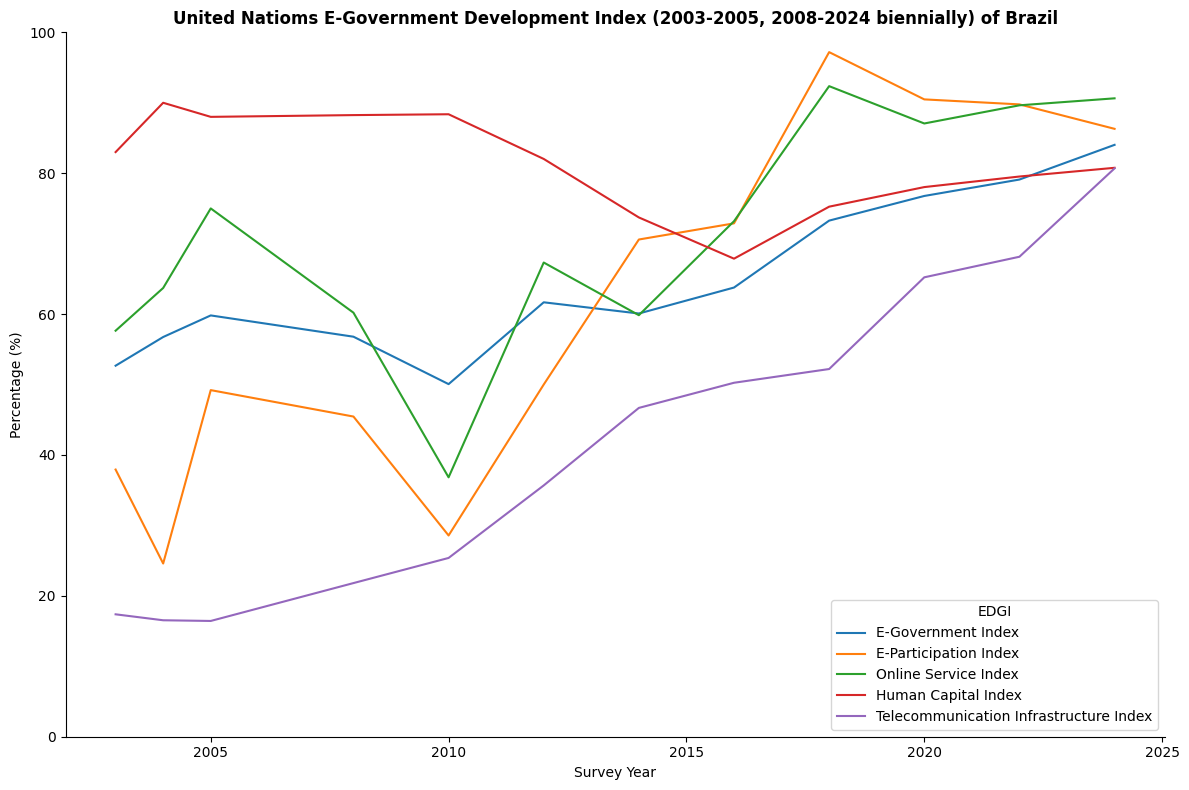

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df_tidy, x='Survey Year', y='Percentage', hue='Metric')

sns.despine()
ax.set_title('United Natioms E-Government Development Index (2003-2005, 2008-2024 biennially) of Brazil', fontweight='bold')
ax.set_ylabel("Percentage (%)")
ax.set_ylim(0, 100)
ax.legend(title="EDGI")
plt.tight_layout()
plt.show()